<a href="https://colab.research.google.com/github/sanusarang/AI-Chatbot/blob/main/Copy_of_SMA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tweepy


In [3]:
import tweepy
import pandas as pd

# Step 1: Set up Twitter API v2 keys (replace with your credentials)
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAP6pyQEAAAAAmJ6UCd72A3NFui8XRHqAUGxeLIQ%3D9awQUacV3gzpOq5hiuoTpfSkgYyomlr48OtOvShaUurr7Hiq7b"

# Step 2: Authenticate to the API using Tweepy's Client
client = tweepy.Client(bearer_token=BEARER_TOKEN)

# Step 3: Define search query and parameters
query = "Artificial Intelligence -is:retweet lang:en"  # Filter out retweets, English tweets only
max_results = 100  # Number of tweets to fetch (max 100 per request)
tweets_data = []

# Step 4: Fetch tweets
response = client.search_recent_tweets(query=query, tweet_fields=["created_at", "public_metrics", "text"], max_results=max_results)

if response.data:
    for tweet in response.data:
        tweets_data.append({
            "Tweet": tweet.text,
            "Created At": tweet.created_at,
            "Retweets": tweet.public_metrics["retweet_count"],
            "Likes": tweet.public_metrics["like_count"]
        })

# Step 5: Save data to a DataFrame
df = pd.DataFrame(tweets_data)

# Step 6: Export data to CSV
df.to_csv("twitter_data_v2.csv", index=False)
print("Data saved to twitter_data_v2.csv")


TooManyRequests: 429 Too Many Requests
Too Many Requests

In [ ]:
import pandas as pd

df = pd.read_csv("twitter_data_v2.csv")
print(df.head())


                                               Tweet  \
0  The future of innovation lies in collaboration...   
1  ⚛️ A quick note on #DeepSeekR1 🚀\n\nWould rece...   
2  @1000xgirl The entire #Bitcoin ecosystem will ...   
3  New Research: Adapting educational practices f...   
4  @9Laura_M What's going on with this artificial...   

                  Created At  Retweets  Likes  
0  2025-01-28 18:41:17+00:00         0      0  
1  2025-01-28 18:41:00+00:00         0      0  
2  2025-01-28 18:40:33+00:00         0      0  
3  2025-01-28 18:40:32+00:00         0      0  
4  2025-01-28 18:40:31+00:00         0      0  


In [ ]:
print(df.info())  # Check for null values
df.drop_duplicates(inplace=True)  # Remove duplicates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet       100 non-null    object
 1   Created At  100 non-null    object
 2   Retweets    100 non-null    int64 
 3   Likes       100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB
None


In [ ]:
print(df.describe())
print(df["Created At"].min(), df["Created At"].max())


         Retweets       Likes
count  100.000000  100.000000
mean     0.230000    0.830000
std      0.930461    2.590016
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.000000    0.000000
75%      0.000000    1.000000
max      7.000000   21.000000
2025-01-28 18:25:30+00:00 2025-01-28 18:41:17+00:00


In [ ]:
from textblob import TextBlob

def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Tweet"].apply(analyze_sentiment)
print(df["Sentiment"].value_counts())


Sentiment
Negative    71
Positive    22
Neutral      7
Name: count, dtype: int64


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(tweet):
    score = sia.polarity_scores(tweet)
    if score["compound"] > 0:
        return "Positive"
    elif score["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Tweet"].apply(analyze_sentiment_vader)
print(df["Sentiment"].value_counts())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment
Positive    80
Negative    16
Neutral      4
Name: count, dtype: int64


<ipython-input-8-4ac514bb7648>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="viridis")


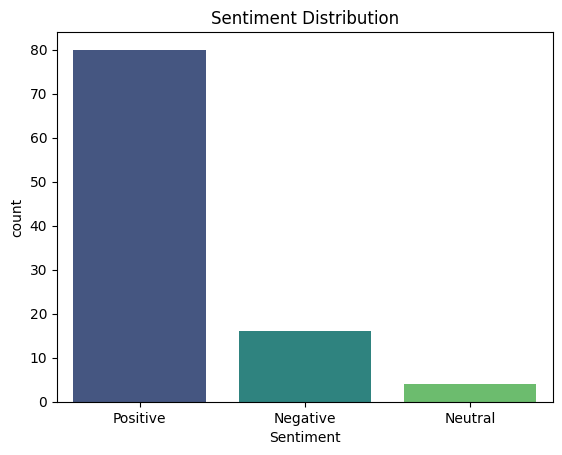

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Sentiment", data=df, palette="viridis")
plt.title("Sentiment Distribution")
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


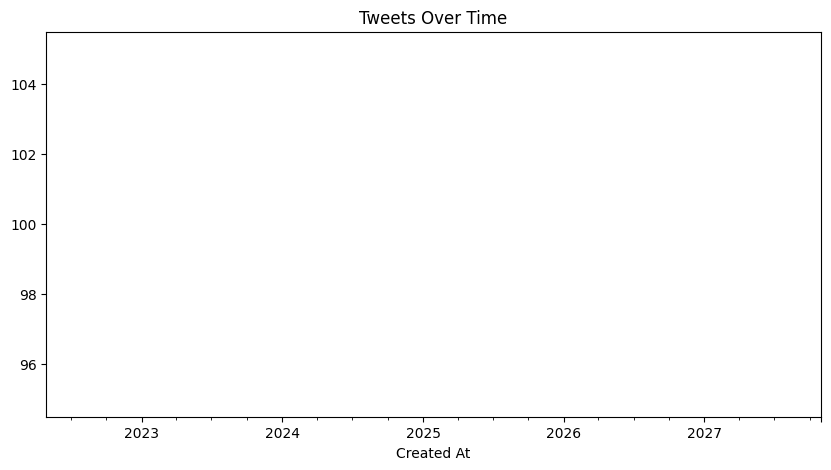

In [ ]:
df["Created At"] = pd.to_datetime(df["Created At"])  # Convert to datetime
df.set_index("Created At", inplace=True)
df["Tweet"].resample("D").count().plot(title="Tweets Over Time", figsize=(10, 5))
plt.show()


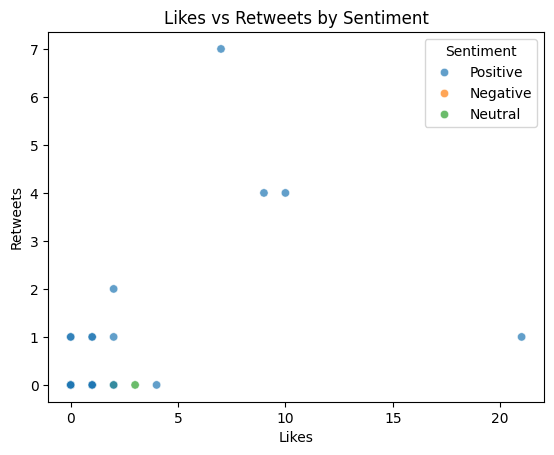

In [ ]:
sns.scatterplot(data=df, x="Likes", y="Retweets", hue="Sentiment", alpha=0.7)
plt.title("Likes vs Retweets by Sentiment")
plt.show()


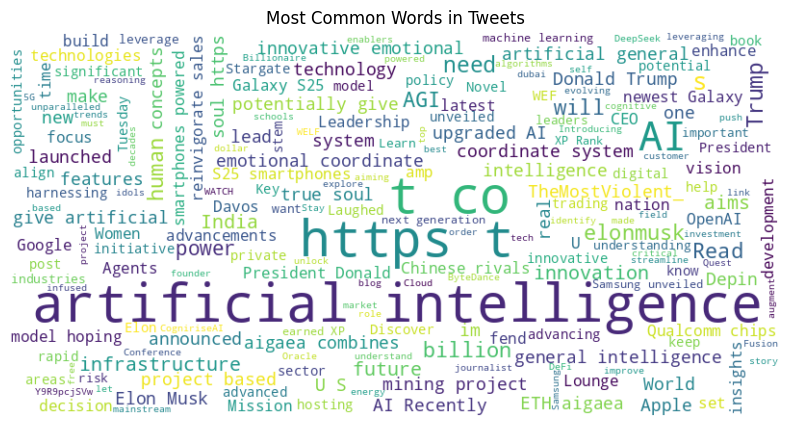

In [ ]:
from wordcloud import WordCloud

all_words = " ".join(df["Tweet"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()


In [ ]:
df.to_csv("processed_twitter_data.csv", index=False)
print("Processed data saved!")


Processed data saved!
